In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train=pd.read_csv("/content/train-chennai-sale.csv")

In [ ]:
train.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
train.shape

(7109, 22)

In [ ]:
train.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

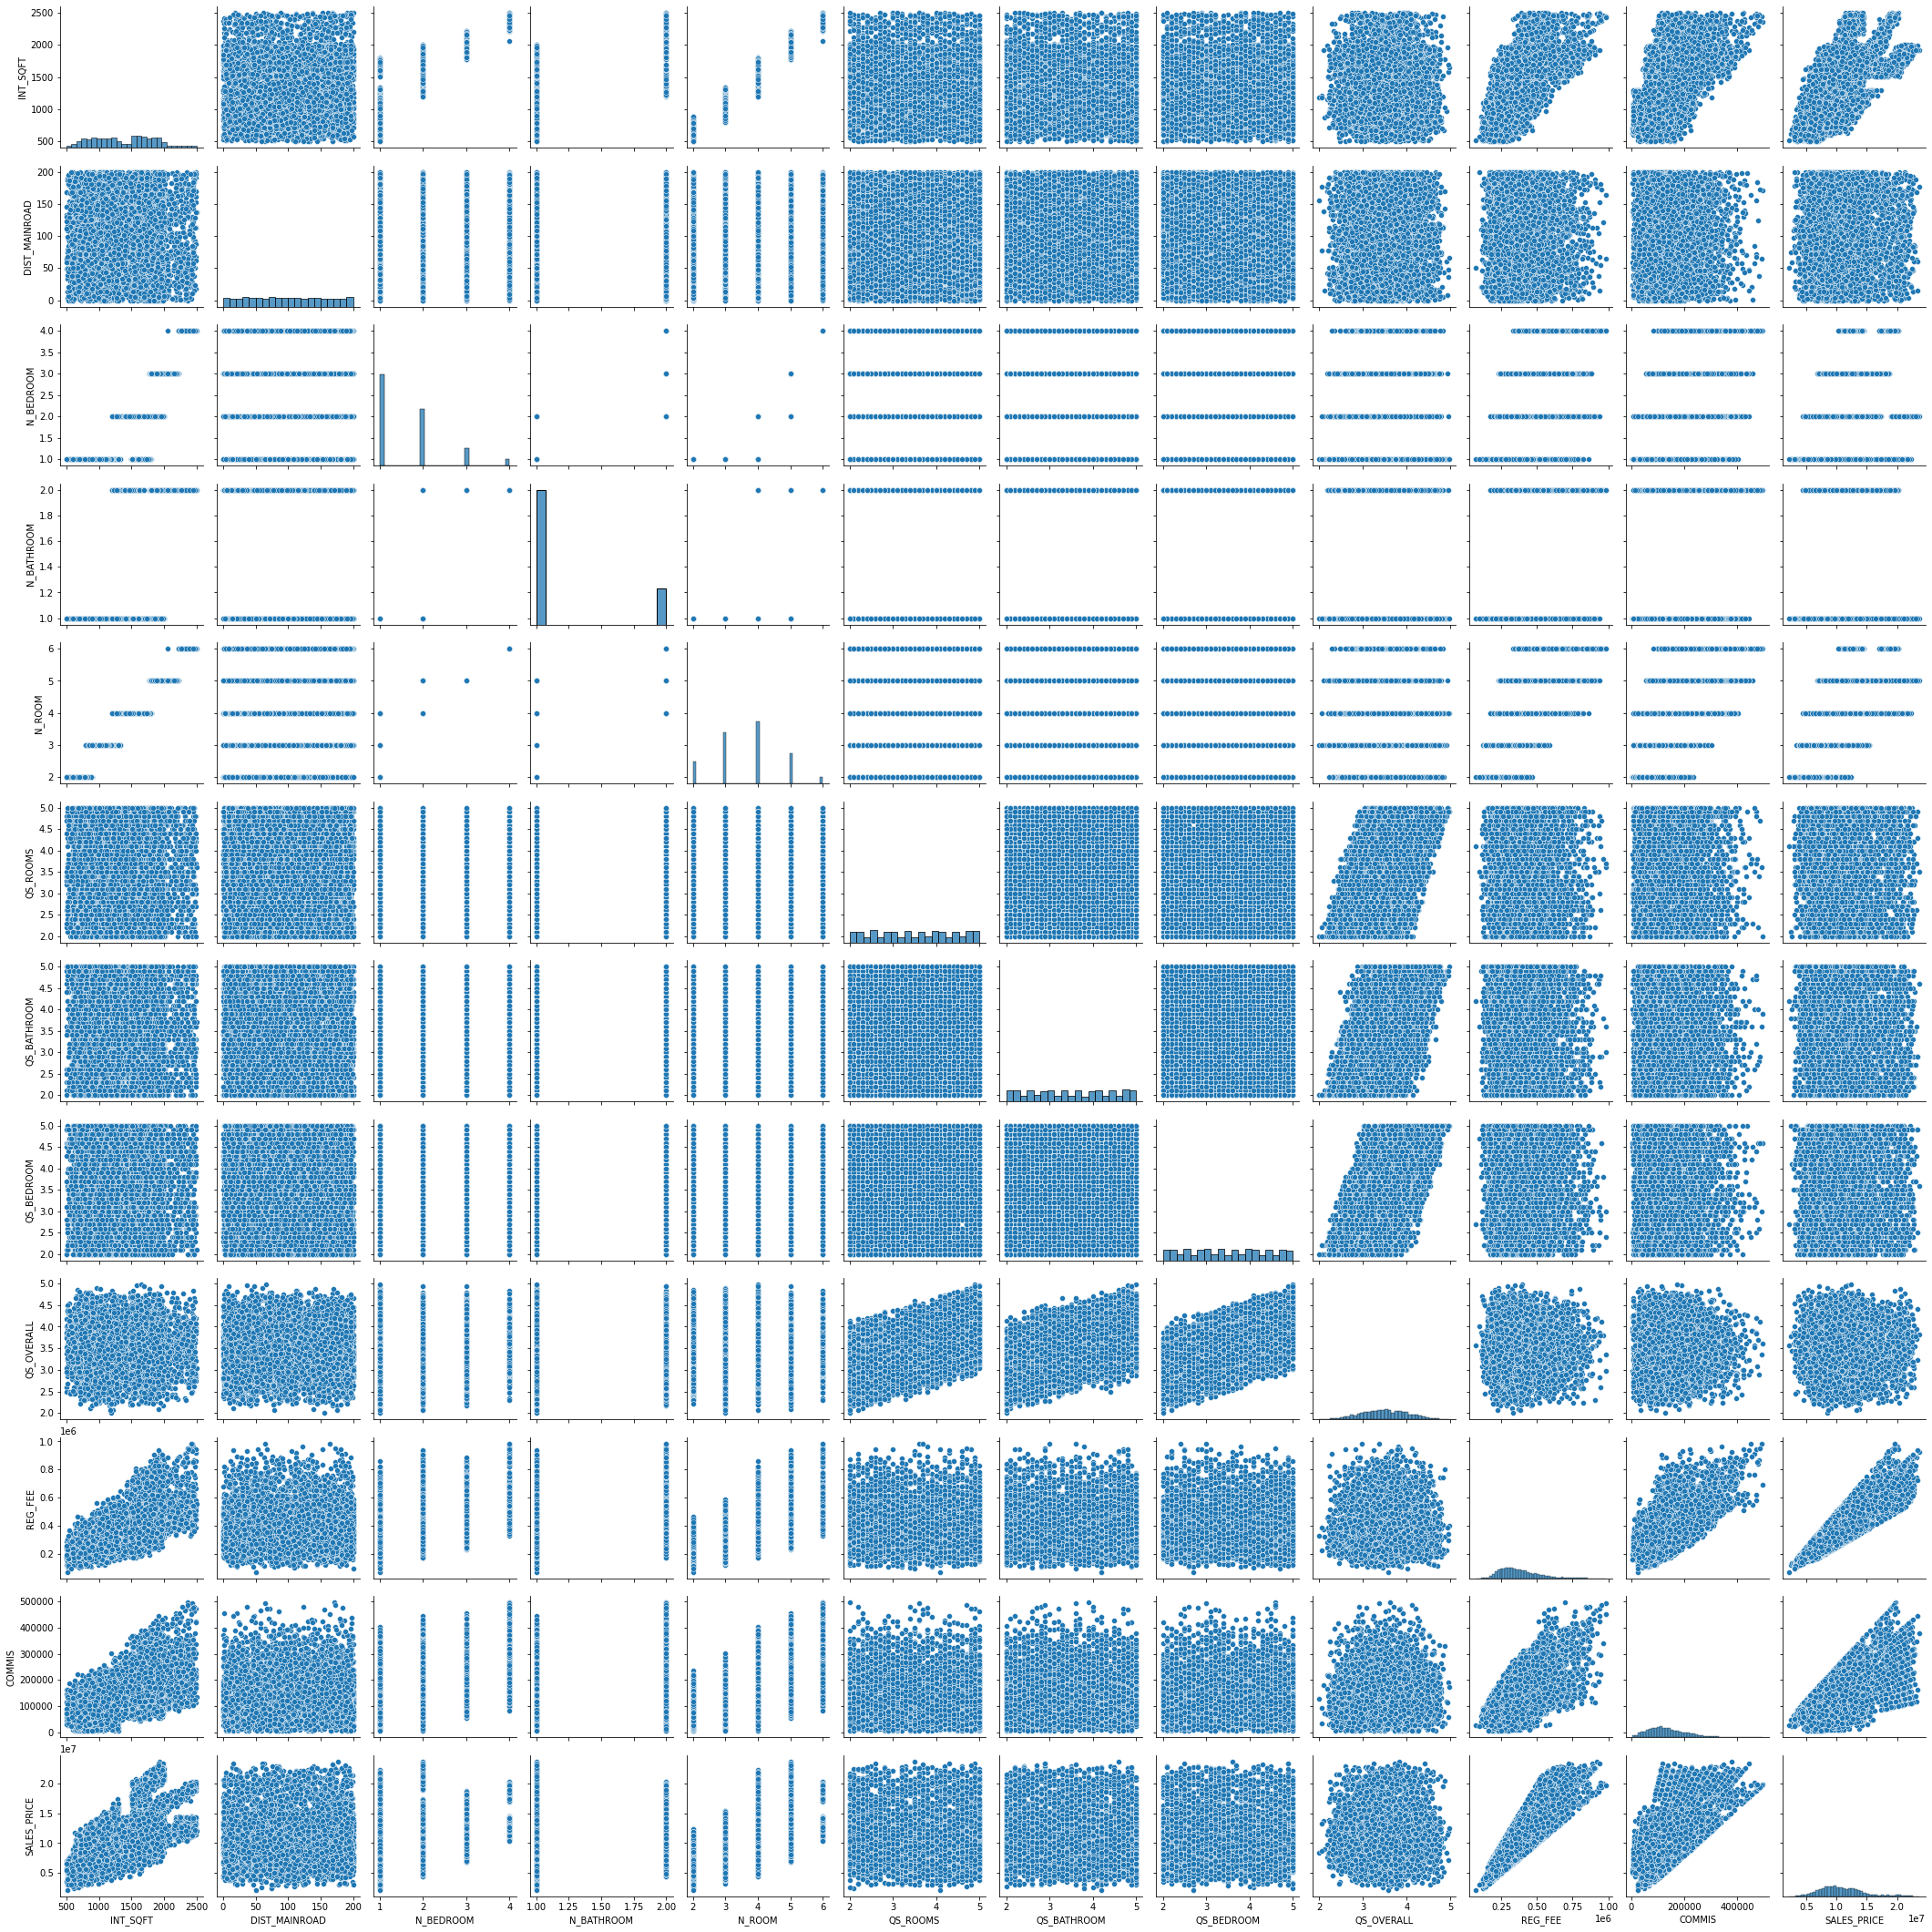

In [ ]:
sns.pairplot(train)

##PRT_ID

In [ ]:
train.PRT_ID.value_counts

<bound method IndexOpsMixin.value_counts of 0       P03210
1       P09411
2       P01812
3       P05346
4       P06210
         ...  
7104    P03834
7105    P10000
7106    P09594
7107    P06508
7108    P09794
Name: PRT_ID, Length: 7109, dtype: object>

In [ ]:
train.drop("PRT_ID",axis=1,inplace=True)

In [ ]:
train.head(2)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


##AREA

In [ ]:
train.AREA.isnull().sum()

0

In [ ]:
train["AREA"].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

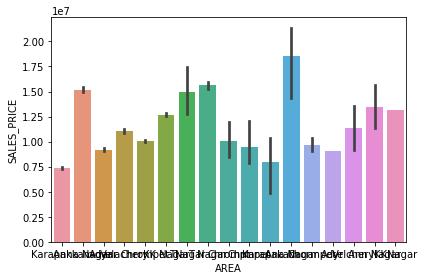

In [ ]:
# plt.figure(figsize=(12,6))
# plt.bar(x=AREA,height=SALES_PRICE)
sns.barplot(x=train.AREA, y=train.SALES_PRICE)
plt.tight_layout()

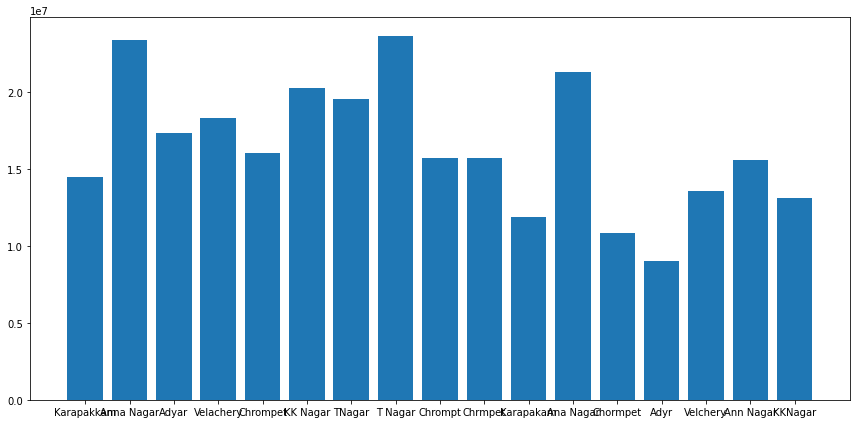

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=train.AREA,height=train.SALES_PRICE)
plt.tight_layout()

In [ ]:
train["AREA"]=train["AREA"].map({"Chrompet":1,"Chrompet":1,"Chrmpet":1,"Chormpet":1,"Karapakkam":2,"Karapakam":2,"KK Nagar":3,"KKNagar":3,"Velachery":4,"Velchery":4,"Anna Nagar":5,"Ana Nagar":5,"Adyar":6,"Adyr":6,"T Nagar":7,"TNagar":7})


In [ ]:
train.AREA

0       2.0
1       5.0
2       6.0
3       4.0
4       2.0
       ... 
7104    2.0
7105    4.0
7106    4.0
7107    2.0
7108    4.0
Name: AREA, Length: 7109, dtype: float64

In [ ]:
AREA=pd.get_dummies(train["AREA"],drop_first=True).astype(int)

In [ ]:
train.AREA.isnull().sum()

11

In [ ]:
train=pd.concat([train,AREA],axis=1)

In [ ]:
train.AREA

0       2.0
1       5.0
2       6.0
3       4.0
4       2.0
       ... 
7104    2.0
7105    4.0
7106    4.0
7107    2.0
7108    4.0
Name: AREA, Length: 7109, dtype: float64

In [ ]:
train.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,2.0,3.0,4.0,5.0,6.0,7.0
0,2.0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,4.330,380000,144400,7600000,1,0,0,0,0,0
1,5.0,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,3.765,760122,304049,21717770,0,0,0,1,0,0
2,6.0,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,3.090,421094,92114,13159200,0,0,0,0,1,0
3,4.0,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,4.010,356321,77042,9630290,0,0,1,0,0,0
4,2.0,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,3.290,237000,74063,7406250,1,0,0,0,0,0


In [ ]:
train = train.drop(columns=["AREA"])

In [ ]:
train.head()

,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,...,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,2.0,3.0,4.0,5.0,6.0,7.0
0,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,...,4.330,380000,144400,7600000,1,0,0,0,0,0
1,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,...,3.765,760122,304049,21717770,0,0,0,1,0,0
2,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,...,3.090,421094,92114,13159200,0,0,0,0,1,0
3,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,...,4.010,356321,77042,9630290,0,0,1,0,0,0
4,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,...,3.290,237000,74063,7406250,1,0,0,0,0,0


##INT_SQFT

In [ ]:
train["INT_SQFT"].value_counts()

1781    18
1538    15
1505    13
1514    13
1634    12
        ..
559      1
2479     1
1330     1
880      1
598      1
Name: INT_SQFT, Length: 1699, dtype: int64

In [ ]:
train.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [ ]:
train.INT_SQFT.isnull().sum()

0

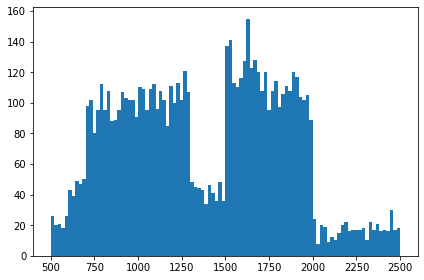

In [ ]:
plt.hist(train.INT_SQFT,bins=100)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


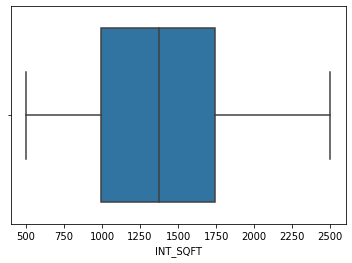

In [ ]:
sns.boxplot(train.INT_SQFT)

##DATE_SALE

In [ ]:
train["DATE_SALE"].value_counts()

06-10-2009    12
06-01-2009    10
12-04-2011    10
26-02-2012    10
17-11-2010    10
              ..
21-12-2014     1
29-06-2004     1
27-08-2004     1
03-05-2012     1
13-07-2005     1
Name: DATE_SALE, Length: 2798, dtype: int64

In [ ]:
train.DATE_SALE.isnull().sum()

0

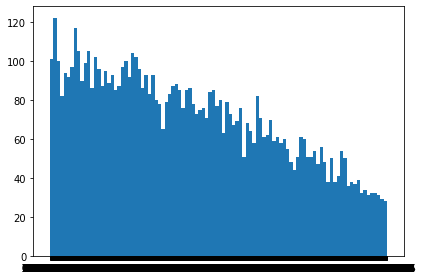

In [ ]:
plt.hist(train.DATE_SALE,bins=100)
plt.tight_layout()

In [ ]:
import datetime

In [ ]:
train.DATE_SALE = pd.to_datetime(train.DATE_SALE, format ="%d-%m-%Y", errors ="ignore")

In [ ]:
train.DATE_SALE

0      2011-05-04
1      2006-12-19
2      2012-02-04
3      2010-03-13
4      2009-10-05
          ...    
7104   2011-01-03
7105   2004-04-08
7106   2006-08-25
7107   2009-08-03
7108   2005-07-13
Name: DATE_SALE, Length: 7109, dtype: datetime64[ns]

In [ ]:
train["SALE_YEAR"]=train["DATE_SALE"].dt.year

In [ ]:
train["SALE_YEAR"]

0       2011
1       2006
2       2012
3       2010
4       2009
        ... 
7104    2011
7105    2004
7106    2006
7107    2009
7108    2005
Name: SALE_YEAR, Length: 7109, dtype: int64

In [ ]:
train["SALE_MONTH"]=train["DATE_SALE"].dt.month

In [ ]:
train["SALE_MONTH"]

0        5
1       12
2        2
3        3
4       10
        ..
7104     1
7105     4
7106     8
7107     8
7108     7
Name: SALE_MONTH, Length: 7109, dtype: int64

In [ ]:
train["SALE_DAY"] = train["DATE_SALE"].dt.day

In [ ]:
train["SALE_DAY"]

0        4
1       19
2        4
3       13
4        5
        ..
7104     3
7105     8
7106    25
7107     3
7108    13
Name: SALE_DAY, Length: 7109, dtype: int64

In [ ]:
train = train.drop(columns=["DATE_SALE"])

In [ ]:
train.head(2)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,...,SALES_PRICE,2.0,3.0,4.0,5.0,6.0,7.0,SALE_YEAR,SALE_MONTH,SALE_DAY
0,1004,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,...,7600000,1,0,0,0,0,0,2011,5,4
1,1986,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,...,21717770,0,0,0,1,0,0,2006,12,19


##DIST_MAINROAD

In [ ]:
train["DIST_MAINROAD"].value_counts()

39     56
51     53
78     52
77     49
73     48
       ..
33     24
136    24
167    24
12     23
25     20
Name: DIST_MAINROAD, Length: 201, dtype: int64

In [ ]:
train.DIST_MAINROAD.isnull().sum()

0

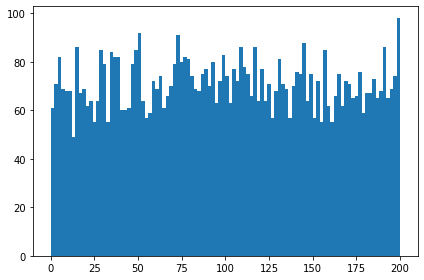

In [ ]:
plt.hist(train.DIST_MAINROAD,bins=100)
plt.tight_layout()

In [ ]:
train.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

##N_BEDROOM

In [ ]:
train.N_BEDROOM.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [ ]:
train.N_BEDROOM.isnull().sum()

1

In [ ]:
train=train.dropna(subset=["N_BEDROOM"])

In [ ]:
train.N_BEDROOM.isnull().sum()

0

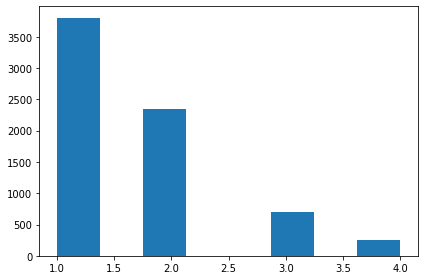

In [ ]:
plt.hist(train.N_BEDROOM,bins=8)
plt.tight_layout()

In [ ]:
train.N_BEDROOM.describe()

count    7108.000000
mean        1.637029
std         0.802902
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: N_BEDROOM, dtype: float64

##N_BATHROOM

In [ ]:
train.N_BATHROOM.value_counts()

1.0    5588
2.0    1515
Name: N_BATHROOM, dtype: int64

In [ ]:
train.N_BATHROOM.isnull().sum()

5

In [ ]:
train=train.dropna(subset=["N_BATHROOM"])

In [ ]:
train.N_BATHROOM.isnull().sum()

0

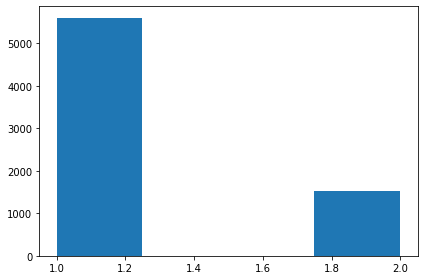

In [ ]:
plt.hist(train.N_BATHROOM,bins=4)
plt.tight_layout()

In [ ]:
train.N_BATHROOM.describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

##N_ROOM

In [ ]:
train["N_ROOM"].value_counts()

4    2561
3    2122
5    1245
2     921
6     254
Name: N_ROOM, dtype: int64

In [ ]:
train.N_ROOM.isnull().sum()

0

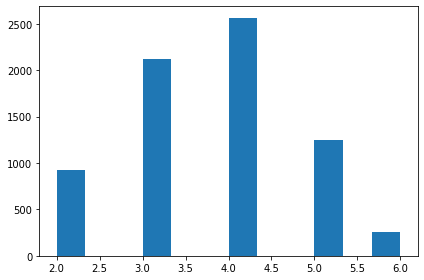

In [ ]:
plt.hist(train.N_ROOM,bins=12)
plt.tight_layout()

In [ ]:
train.N_ROOM.describe()

count    7103.000000
mean        3.688723
std         1.019299
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: N_ROOM, dtype: float64

##SALE_COND

In [ ]:
train["SALE_COND"].value_counts()

AdjLand        1433
Partial        1427
Normal Sale    1422
AbNormal       1405
Family         1402
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
#train=train.drop_duplicates(subset="SALE_COND")

In [ ]:
#train["SALE_COND"].value_counts()

In [ ]:
train.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

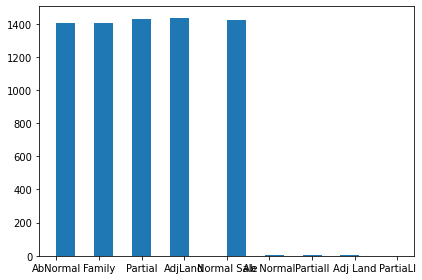

In [ ]:
plt.hist(train.SALE_COND,bins=18)
plt.tight_layout()

In [ ]:
train["SALE_COND"]=train["SALE_COND"].map({"AdjLand":1,"Adj Land":1,"Partial":2,"Partiall":2,"PartiaLl":2,"Normal Sale":3,"AbNormal":4,"Ab Normal":4,"Family":5})

In [ ]:
train["SALE_COND"].value_counts()

1    1439
2    1430
3    1422
4    1410
5    1402
Name: SALE_COND, dtype: int64

In [ ]:
SALE_COND=pd.get_dummies(train["SALE_COND"],drop_first=True).astype(int)

In [ ]:
train=pd.concat([train,SALE_COND],axis=1)

In [ ]:
train = train.drop(columns=["SALE_COND"])

In [ ]:
train.head(2)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,...,5.0,6.0,7.0,SALE_YEAR,SALE_MONTH,SALE_DAY,2,3,4,5
0,1004,131,1.0,1.0,3,Yes,15-05-1967,Commercial,AllPub,Paved,...,0,0,0,2011,5,4,0,0,1,0
1,1986,26,2.0,1.0,5,No,22-12-1995,Commercial,AllPub,Gravel,...,1,0,0,2006,12,19,0,0,1,0


##PARK_FACIL

In [ ]:
train.PARK_FACIL.value_counts()

Yes    3584
No     3517
Noo       2
Name: PARK_FACIL, dtype: int64

In [ ]:
train.PARK_FACIL.isnull().sum()

0

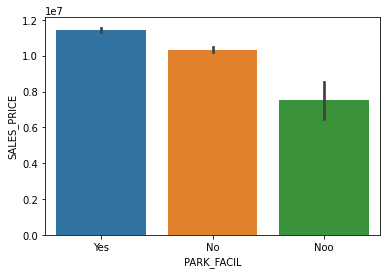

In [ ]:
sns.barplot(x=train.PARK_FACIL,y=train.SALES_PRICE)

<function matplotlib.pyplot.tight_layout>

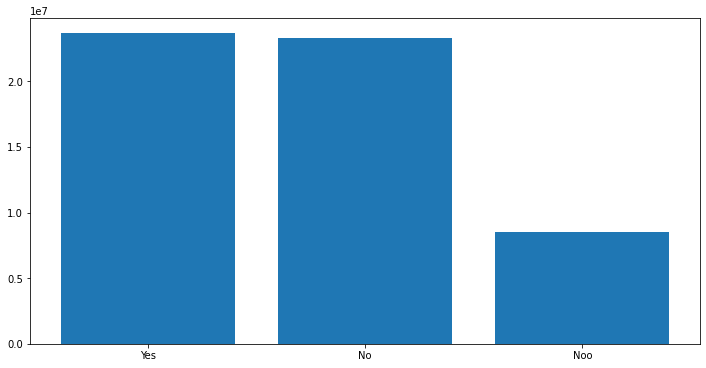

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=train.PARK_FACIL,height=train.SALES_PRICE)
plt.tight_layout

In [ ]:
train.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
train["PARK_FACIL"]=train["PARK_FACIL"].map({"Yes":1,"No":0,"Noo":0})

<function matplotlib.pyplot.tight_layout>

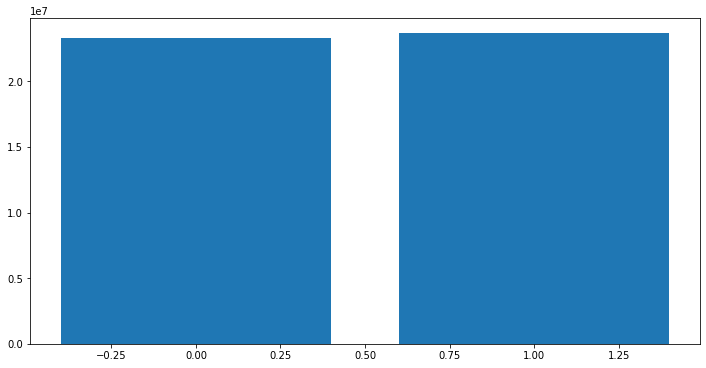

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=train.PARK_FACIL,height=train.SALES_PRICE)
plt.tight_layout

In [ ]:
train.PARK_FACIL.dtype

dtype('int64')

In [ ]:
train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,...,5.0,6.0,7.0,SALE_YEAR,SALE_MONTH,SALE_DAY,2,3,4,5
0,1004,131,1.0,1.0,3,1,15-05-1967,Commercial,AllPub,Paved,...,0,0,0,2011,5,4,0,0,1,0
1,1986,26,2.0,1.0,5,0,22-12-1995,Commercial,AllPub,Gravel,...,1,0,0,2006,12,19,0,0,1,0
2,909,70,1.0,1.0,3,1,09-02-1992,Commercial,ELO,Gravel,...,0,1,0,2012,2,4,0,0,1,0
3,1855,14,3.0,2.0,5,0,18-03-1988,Others,NoSewr,Paved,...,0,0,0,2010,3,13,0,0,0,1
4,1226,84,1.0,1.0,3,1,13-10-1979,Others,AllPub,Gravel,...,0,0,0,2009,10,5,0,0,1,0


##DATE_BUILD

In [ ]:
train["DATE_BUILD"].value_counts()

02-07-1987    6
04-04-1999    5
18-09-1971    4
03-01-1979    4
27-08-2000    4
             ..
12-02-1998    1
04-11-1977    1
21-04-1986    1
18-09-1978    1
24-07-1961    1
Name: DATE_BUILD, Length: 5805, dtype: int64

In [ ]:
train.DATE_BUILD.isnull().sum()

0

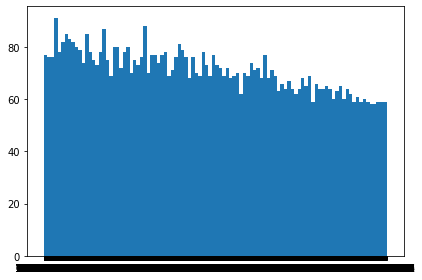

In [ ]:
plt.hist(train.DATE_BUILD,bins=100)
plt.tight_layout()

In [ ]:
import datetime

In [ ]:
train.DATE_BUILD = pd.to_datetime(train.DATE_BUILD, format="%d-%m-%Y", errors ="ignore")

In [ ]:
train.DATE_BUILD

0      1967-05-15
1      1995-12-22
2      1992-02-09
3      1988-03-18
4      1979-10-13
          ...    
7104   1962-01-15
7105   1995-04-11
7106   1978-09-01
7107   1977-08-11
7108   1961-07-24
Name: DATE_BUILD, Length: 7103, dtype: datetime64[ns]

In [ ]:
train["BUILD_YEAR"]=train["DATE_BUILD"].dt.year

In [ ]:
train["BUILD_YEAR"]

0       1967
1       1995
2       1992
3       1988
4       1979
        ... 
7104    1962
7105    1995
7106    1978
7107    1977
7108    1961
Name: BUILD_YEAR, Length: 7103, dtype: int64

In [ ]:
train["BUILD_MONTH"]=train["DATE_BUILD"].dt.month

In [ ]:
train["BUILD_MONTH"]

0        5
1       12
2        2
3        3
4       10
        ..
7104     1
7105     4
7106     9
7107     8
7108     7
Name: BUILD_MONTH, Length: 7103, dtype: int64

In [ ]:
train["BUILD_DAY"]=train["DATE_BUILD"].dt.day

In [ ]:
train["BUILD_DAY"]

0       15
1       22
2        9
3       18
4       13
        ..
7104    15
7105    11
7106     1
7107    11
7108    24
Name: BUILD_DAY, Length: 7103, dtype: int64

In [ ]:
train = train.drop(columns=["DATE_BUILD"])

##BUILDTYPE

In [ ]:
train["BUILDTYPE"].value_counts()

House         2443
Commercial    2325
Others        2305
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

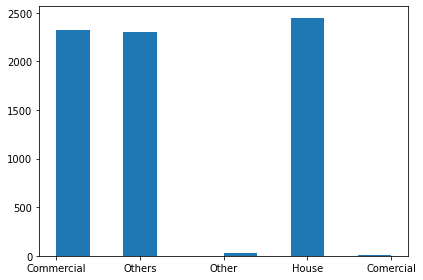

In [ ]:
plt.hist(train.BUILDTYPE,bins=10)
plt.tight_layout()

In [ ]:
train["BUILDTYPE"]=train["BUILDTYPE"].map({"House":1,"Commercial":2,"Comercial":2,"Others":3,"Other":3})

In [ ]:
train["BUILDTYPE"].value_counts()

1    2443
3    2331
2    2329
Name: BUILDTYPE, dtype: int64

In [ ]:
BUILDTYPE=pd.get_dummies(train["BUILDTYPE"],drop_first=True).astype(int)

In [ ]:
train=pd.concat([train,BUILDTYPE],axis=1)

In [ ]:
train = train.drop(columns=["BUILDTYPE"])

In [ ]:
train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,...,SALE_DAY,2,3,4,5,BUILD_YEAR,BUILD_MONTH,BUILD_DAY,2,3
0,1004,131,1.0,1.0,3,1,AllPub,Paved,A,4.0,...,4,0,0,1,0,1967,5,15,1,0
1,1986,26,2.0,1.0,5,0,AllPub,Gravel,RH,4.9,...,19,0,0,1,0,1995,12,22,1,0
2,909,70,1.0,1.0,3,1,ELO,Gravel,RL,4.1,...,4,0,0,1,0,1992,2,9,1,0
3,1855,14,3.0,2.0,5,0,NoSewr,Paved,I,4.7,...,13,0,0,0,1,1988,3,18,0,1
4,1226,84,1.0,1.0,3,1,AllPub,Gravel,C,3.0,...,5,0,0,1,0,1979,10,13,0,1


##UTILITY_AVAIL

In [ ]:
train["UTILITY_AVAIL"].value_counts()

AllPub     1885
NoSeWa     1870
NoSewr     1826
ELO        1521
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
train.UTILITY_AVAIL.isnull().sum()

0

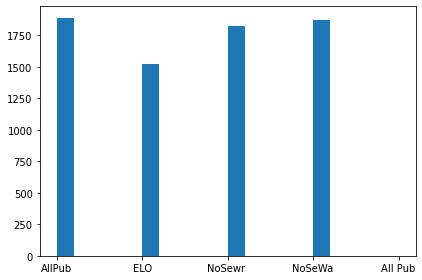

In [ ]:
plt.hist(train.UTILITY_AVAIL,bins=20)
plt.tight_layout()

In [ ]:
train.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
train["UTILITY_AVAIL"]= train["UTILITY_AVAIL"].map({"AllPub":1,"All Pub":1,"NoSeWa":2,"NoSewr":2,"ELO":3})

In [ ]:
train.UTILITY_AVAIL

0       1.0
1       1.0
2       3.0
3       NaN
4       1.0
       ... 
7104    3.0
7105    2.0
7106    2.0
7107    3.0
7108    3.0
Name: UTILITY_AVAIL, Length: 7103, dtype: float64

In [ ]:
train = train.dropna(subset = ["UTILITY_AVAIL"])

In [ ]:
UTILITY_AVAIL=pd.get_dummies(train["UTILITY_AVAIL"],drop_first=True).astype(int)

In [ ]:
train=pd.concat([train,UTILITY_AVAIL],axis=1)

In [ ]:
train =train.drop(columns=["UTILITY_AVAIL"])

In [ ]:
train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,...,3,4,5,BUILD_YEAR,BUILD_MONTH,BUILD_DAY,2,3,2.0,3.0
0,1004,131,1.0,1.0,3,1,Paved,A,4.0,3.9,...,0,1,0,1967,5,15,1,0,0,0
1,1986,26,2.0,1.0,5,0,Gravel,RH,4.9,4.2,...,0,1,0,1995,12,22,1,0,0,0
2,909,70,1.0,1.0,3,1,Gravel,RL,4.1,3.8,...,0,1,0,1992,2,9,1,0,0,1
4,1226,84,1.0,1.0,3,1,Gravel,C,3.0,2.5,...,0,1,0,1979,10,13,0,1,0,0
5,1220,36,2.0,1.0,4,0,No Access,RH,4.5,2.6,...,0,0,0,2009,9,12,1,0,1,0


##STREET

In [ ]:
train["STREET"].value_counts()

Gravel       1861
Paved        1851
No Access    1546
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
train.STREET.isnull().sum()

0

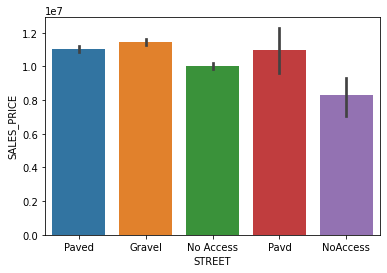

In [ ]:
sns.barplot(x=train.STREET,y=train.SALES_PRICE)

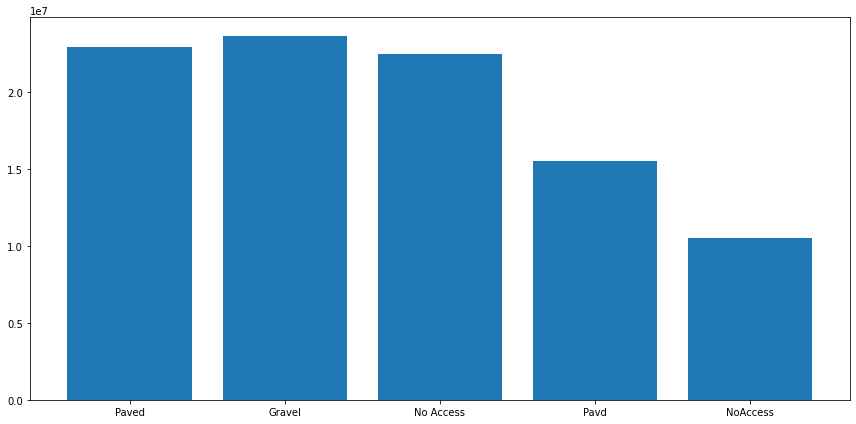

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(x=train.STREET,height=train.SALES_PRICE)
plt.tight_layout()

In [ ]:
train.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
train["STREET"] = train["STREET"].map({"Gravel":1,"Paved":2,"Pavd":2,"No Access":3,"NoAccess":3})

In [ ]:
train.STREET.isnull().sum()

0

In [ ]:
STREET=pd.get_dummies(train["STREET"],drop_first=True).astype(int)

In [ ]:
train=pd.concat([train,STREET],axis=1)

In [ ]:
train = train.drop(columns=["STREET"])

In [ ]:
train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,...,5,BUILD_YEAR,BUILD_MONTH,BUILD_DAY,2,3,2.0,3.0,2,3
0,1004,131,1.0,1.0,3,1,A,4.0,3.9,4.9,...,0,1967,5,15,1,0,0,0,1,0
1,1986,26,2.0,1.0,5,0,RH,4.9,4.2,2.5,...,0,1995,12,22,1,0,0,0,0,0
2,909,70,1.0,1.0,3,1,RL,4.1,3.8,2.2,...,0,1992,2,9,1,0,0,1,0,0
4,1226,84,1.0,1.0,3,1,C,3.0,2.5,4.1,...,0,1979,10,13,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,0,RH,4.5,2.6,3.1,...,0,2009,9,12,1,0,1,0,0,1


##MZZONE

In [ ]:
train["MZZONE"].value_counts()

RL    1369
RH    1352
RM    1337
A      413
C      405
I      401
Name: MZZONE, dtype: int64

In [ ]:
train.MZZONE.unique()

array(['A', 'RH', 'RL', 'C', 'RM', 'I'], dtype=object)

In [ ]:
train.MZZONE.isnull().sum()

0

(array([ 413.,    0., 1352.,    0., 1369.,    0.,    0.,  405.,    0.,
        1337.,    0.,  401.]),
 array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667,
        2.08333333, 2.5       , 2.91666667, 3.33333333, 3.75      ,
        4.16666667, 4.58333333, 5.        ]),
 <a list of 12 Patch objects>)

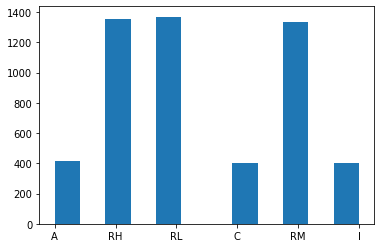

In [ ]:
plt.hist(train.MZZONE,bins=12)

In [ ]:
MZZONE=pd.get_dummies(train["MZZONE"],drop_first=True).astype(int)

In [ ]:
MZZONE

,C,I,RH,RL,RM
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
4,1,0,0,0,0
5,0,0,1,0,0
...,...,...,...,...,...
7104,0,0,0,0,1
7105,0,0,1,0,0
7106,0,1,0,0,0
7107,0,0,0,1,0


In [ ]:
train.MZZONE.isnull().sum()

0

In [ ]:
train.MZZONE.dtype

dtype('O')

In [ ]:
train=pd.concat([train,MZZONE],axis=1)

In [ ]:
train = train.drop(columns=["MZZONE"])

In [ ]:
train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,3,2.0,3.0,2,3,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,...,0,0,0,1,0,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,...,0,0,1,0,0,0,0,0,1,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,...,1,0,0,0,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,0,4.5,2.6,3.1,3.320,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
train.columns

Index([     'INT_SQFT', 'DIST_MAINROAD',     'N_BEDROOM',    'N_BATHROOM',
              'N_ROOM',    'PARK_FACIL',      'QS_ROOMS',   'QS_BATHROOM',
          'QS_BEDROOM',    'QS_OVERALL',       'REG_FEE',        'COMMIS',
         'SALES_PRICE',             2.0,             3.0,             4.0,
                   5.0,             6.0,             7.0,     'SALE_YEAR',
          'SALE_MONTH',      'SALE_DAY',               2,               3,
                     4,               5,    'BUILD_YEAR',   'BUILD_MONTH',
           'BUILD_DAY',               2,               3,             2.0,
                   3.0,               2,               3,             'C',
                   'I',            'RH',            'RL',            'RM'],
      dtype='object')

##QS_ROOMS

In [ ]:
train["QS_ROOMS"].value_counts()

2.5    203
3.8    199
3.6    188
4.9    186
3.1    184
2.6    183
4.6    181
3.3    179
5.0    176
3.4    175
4.2    172
2.1    172
4.7    171
3.0    170
3.9    170
4.8    169
2.9    168
3.5    167
4.5    167
4.1    165
4.3    164
2.0    164
2.8    163
3.7    162
2.3    160
4.4    159
4.0    157
2.7    152
2.2    151
3.2    150
2.4    150
Name: QS_ROOMS, dtype: int64

In [ ]:
train.QS_ROOMS.isnull().sum()

0

(array([164.,   0.,   0., 172.,   0.,   0., 151.,   0.,   0.,   0., 160.,
          0.,   0., 150.,   0.,   0., 203.,   0.,   0.,   0., 183.,   0.,
          0., 152.,   0.,   0., 163.,   0.,   0.,   0., 168.,   0.,   0.,
        170.,   0.,   0., 184.,   0.,   0.,   0., 150.,   0.,   0., 179.,
          0.,   0., 175.,   0.,   0.,   0., 167.,   0.,   0., 188.,   0.,
          0., 162.,   0.,   0.,   0., 199.,   0.,   0., 170.,   0.,   0.,
        157.,   0.,   0.,   0., 165.,   0.,   0., 172.,   0.,   0., 164.,
          0.,   0.,   0., 159.,   0.,   0., 167.,   0.,   0., 181.,   0.,
          0.,   0., 171.,   0.,   0., 169.,   0.,   0., 186.,   0.,   0.,
        176.]),
 array([2.  , 2.03, 2.06, 2.09, 2.12, 2.15, 2.18, 2.21, 2.24, 2.27, 2.3 ,
        2.33, 2.36, 2.39, 2.42, 2.45, 2.48, 2.51, 2.54, 2.57, 2.6 , 2.63,
        2.66, 2.69, 2.72, 2.75, 2.78, 2.81, 2.84, 2.87, 2.9 , 2.93, 2.96,
        2.99, 3.02, 3.05, 3.08, 3.11, 3.14, 3.17, 3.2 , 3.23, 3.26, 3.29,
        3.32, 3.35, 3.

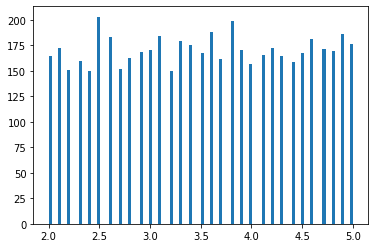

In [ ]:
plt.hist(train.QS_ROOMS,bins=100)

In [ ]:
train.QS_ROOMS.describe()

count    5277.000000
mean        3.512374
std         0.892665
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

##QS_BATHROOM

In [ ]:
train["QS_BATHROOM"].value_counts()

4.8    195
4.9    191
2.9    191
2.7    186
4.7    184
3.7    183
3.4    182
3.0    176
2.3    176
4.2    175
2.1    173
4.6    173
2.4    173
2.5    171
2.6    170
3.6    170
4.4    170
5.0    169
2.2    167
4.0    166
4.3    166
4.5    165
3.5    163
2.0    161
3.2    161
3.3    157
3.1    157
3.8    157
3.9    151
4.1    150
2.8    148
Name: QS_BATHROOM, dtype: int64

In [ ]:
train.QS_BATHROOM.isnull().sum()

0

(array([161.,   0.,   0., 173.,   0.,   0., 167.,   0.,   0.,   0., 176.,
          0.,   0., 173.,   0.,   0., 171.,   0.,   0.,   0., 170.,   0.,
          0., 186.,   0.,   0., 148.,   0.,   0.,   0., 191.,   0.,   0.,
        176.,   0.,   0., 157.,   0.,   0.,   0., 161.,   0.,   0., 157.,
          0.,   0., 182.,   0.,   0.,   0., 163.,   0.,   0., 170.,   0.,
          0., 183.,   0.,   0.,   0., 157.,   0.,   0., 151.,   0.,   0.,
        166.,   0.,   0.,   0., 150.,   0.,   0., 175.,   0.,   0., 166.,
          0.,   0.,   0., 170.,   0.,   0., 165.,   0.,   0., 173.,   0.,
          0.,   0., 184.,   0.,   0., 195.,   0.,   0., 191.,   0.,   0.,
        169.]),
 array([2.  , 2.03, 2.06, 2.09, 2.12, 2.15, 2.18, 2.21, 2.24, 2.27, 2.3 ,
        2.33, 2.36, 2.39, 2.42, 2.45, 2.48, 2.51, 2.54, 2.57, 2.6 , 2.63,
        2.66, 2.69, 2.72, 2.75, 2.78, 2.81, 2.84, 2.87, 2.9 , 2.93, 2.96,
        2.99, 3.02, 3.05, 3.08, 3.11, 3.14, 3.17, 3.2 , 3.23, 3.26, 3.29,
        3.32, 3.35, 3.

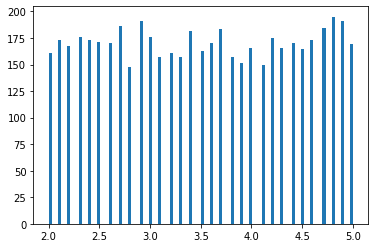

In [ ]:
plt.hist(train.QS_BATHROOM,bins=100)

In [ ]:
train.QS_BATHROOM.describe()

count    5277.000000
mean        3.509646
std         0.903044
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

##QS_BEDROOM

In [ ]:
train["QS_BEDROOM"].value_counts()

2.6    213
3.4    192
3.2    191
2.2    190
3.1    183
4.4    182
3.5    182
2.4    179
4.6    178
4.3    177
3.0    177
2.1    175
3.3    173
4.0    173
4.5    172
2.9    169
2.5    169
2.0    169
4.1    166
3.8    166
4.7    164
3.9    163
4.8    161
3.6    159
2.7    157
4.2    155
5.0    153
2.3    150
2.8    148
3.7    146
4.9    145
Name: QS_BEDROOM, dtype: int64

In [ ]:
train.QS_BEDROOM.isnull().sum()

0

(array([169.,   0.,   0., 175.,   0.,   0., 190.,   0.,   0.,   0., 150.,
          0.,   0., 179.,   0.,   0., 169.,   0.,   0.,   0., 213.,   0.,
          0., 157.,   0.,   0., 148.,   0.,   0.,   0., 169.,   0.,   0.,
        177.,   0.,   0., 183.,   0.,   0.,   0., 191.,   0.,   0., 173.,
          0.,   0., 192.,   0.,   0.,   0., 182.,   0.,   0., 159.,   0.,
          0., 146.,   0.,   0.,   0., 166.,   0.,   0., 163.,   0.,   0.,
        173.,   0.,   0.,   0., 166.,   0.,   0., 155.,   0.,   0., 177.,
          0.,   0.,   0., 182.,   0.,   0., 172.,   0.,   0., 178.,   0.,
          0.,   0., 164.,   0.,   0., 161.,   0.,   0., 145.,   0.,   0.,
        153.]),
 array([2.  , 2.03, 2.06, 2.09, 2.12, 2.15, 2.18, 2.21, 2.24, 2.27, 2.3 ,
        2.33, 2.36, 2.39, 2.42, 2.45, 2.48, 2.51, 2.54, 2.57, 2.6 , 2.63,
        2.66, 2.69, 2.72, 2.75, 2.78, 2.81, 2.84, 2.87, 2.9 , 2.93, 2.96,
        2.99, 3.02, 3.05, 3.08, 3.11, 3.14, 3.17, 3.2 , 3.23, 3.26, 3.29,
        3.32, 3.35, 3.

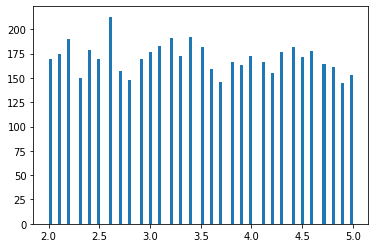

In [ ]:
plt.hist(train.QS_BEDROOM,bins=100)

In [ ]:
train.QS_BEDROOM.describe()

count    5277.000000
mean        3.477260
std         0.888104
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

In [ ]:
train

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,3,2.0,3.0,2,3,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,...,0,0,0,1,0,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,...,0,0,1,0,0,0,0,0,1,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,...,1,0,0,0,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,0,4.5,2.6,3.1,3.320,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,0,3.0,2.2,2.4,2.520,...,1,0,1,0,1,0,0,0,0,1
7105,1897,52,3.0,2.0,5,1,3.6,4.5,3.3,3.920,...,1,1,0,0,1,0,0,1,0,0
7106,1614,152,2.0,1.0,4,0,4.3,4.2,2.9,3.840,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,1.0,1.0,2,1,4.6,3.8,4.1,4.160,...,0,0,1,1,0,0,0,0,1,0


##QS_OVERALL

In [ ]:
train["QS_OVERALL"].value_counts()

3.540    47
3.260    47
3.320    45
3.680    42
3.370    41
         ..
3.825     1
4.075     1
2.495     1
4.950     1
3.245     1
Name: QS_OVERALL, Length: 465, dtype: int64

In [ ]:
train.QS_OVERALL.isnull().sum()

33

In [ ]:
#train["QS_OVERALL"].fillna(train["QS_OVERALL"].mean(),inplace=True)

(array([  1.,   0.,   1.,   2.,   0.,   0.,   5.,   9.,   9.,   8.,  10.,
         17.,  12.,  12.,  21.,  18.,  27.,  25.,  21.,  38.,  34.,  29.,
         49.,  31.,  47.,  63.,  59.,  53.,  63.,  64.,  69.,  64.,  58.,
         65.,  73.,  93.,  90.,  66.,  92.,  85.,  98., 101., 116., 101.,
        113., 115., 108., 104., 112., 103., 111., 128., 111., 111., 101.,
        101., 102.,  89., 101., 104.,  95., 114.,  97.,  92.,  86.,  88.,
         62.,  84.,  68.,  58.,  64.,  61.,  55.,  63.,  58.,  49.,  44.,
         45.,  47.,  41.,  32.,  36.,  27.,  23.,  20.,  14.,  17.,  21.,
         11.,   9.,  16.,  12.,   6.,   6.,   2.,   3.,   1.,   1.,   1.,
          2.]),
 array([2.    , 2.0297, 2.0594, 2.0891, 2.1188, 2.1485, 2.1782, 2.2079,
        2.2376, 2.2673, 2.297 , 2.3267, 2.3564, 2.3861, 2.4158, 2.4455,
        2.4752, 2.5049, 2.5346, 2.5643, 2.594 , 2.6237, 2.6534, 2.6831,
        2.7128, 2.7425, 2.7722, 2.8019, 2.8316, 2.8613, 2.891 , 2.9207,
        2.9504, 2.9801, 3.0098

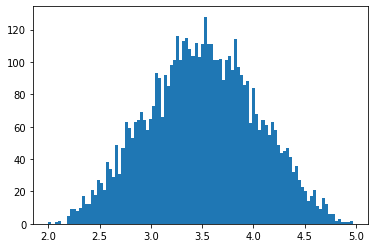

In [ ]:
plt.hist(train.QS_OVERALL,bins=100)

In [ ]:
train = train.dropna(subset=["QS_OVERALL"])

In [ ]:
train.isnull().sum()

INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
PARK_FACIL       0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
2.0              0
3.0              0
4.0              0
5.0              0
6.0              0
7.0              0
SALE_YEAR        0
SALE_MONTH       0
SALE_DAY         0
2                0
3                0
4                0
5                0
BUILD_YEAR       0
BUILD_MONTH      0
BUILD_DAY        0
2                0
3                0
2.0              0
3.0              0
2                0
3                0
C                0
I                0
RH               0
RL               0
RM               0
dtype: int64

##REG_FEE

In [ ]:
train = train.drop(columns =["REG_FEE"])

In [ ]:
train.head(2)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,3,2.0,3.0,2,3,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,...,0,0,0,1,0,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0


##COMMIS

In [ ]:
train = train.drop(columns =["COMMIS"])

In [ ]:
train.head(2)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,3,2.0,3.0,2,3,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,...,0,0,0,1,0,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0


##SALES_PRICE

In [ ]:
train["SALES_PRICE"].isnull().sum()

0

In [ ]:
train.SALES_PRICE.unique()

array([ 7600000, 21717770, 13159200, ...,  8351410,  8507000,  9976480])

In [ ]:
train.SALES_PRICE.describe()

count    5.244000e+03
mean     1.087830e+07
std      3.820956e+06
min      2.156875e+06
25%      8.232415e+06
50%      1.028028e+07
75%      1.298656e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [ ]:
train.head()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,3,2.0,3.0,2,3,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,...,0,0,0,1,0,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,...,0,0,1,0,0,0,0,0,1,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,...,1,0,0,0,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,0,4.5,2.6,3.1,3.320,...,0,1,0,0,1,0,0,1,0,0


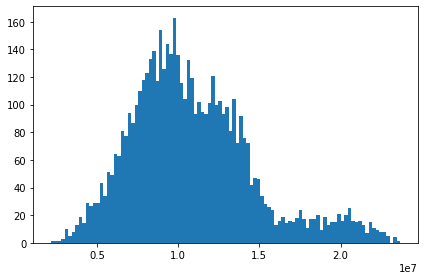

In [ ]:
plt.hist(train.SALES_PRICE,bins=100)
plt.tight_layout()

In [ ]:
train.isnull().sum()

INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
PARK_FACIL       0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
2.0              0
3.0              0
4.0              0
5.0              0
6.0              0
7.0              0
SALE_YEAR        0
SALE_MONTH       0
SALE_DAY         0
2                0
3                0
4                0
5                0
BUILD_YEAR       0
BUILD_MONTH      0
BUILD_DAY        0
2                0
3                0
2.0              0
3.0              0
2                0
3                0
C                0
I                0
RH               0
RL               0
RM               0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5244 entries, 0 to 7108
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INT_SQFT       5244 non-null   int64  
 1   DIST_MAINROAD  5244 non-null   int64  
 2   N_BEDROOM      5244 non-null   float64
 3   N_BATHROOM     5244 non-null   float64
 4   N_ROOM         5244 non-null   int64  
 5   PARK_FACIL     5244 non-null   int64  
 6   QS_ROOMS       5244 non-null   float64
 7   QS_BATHROOM    5244 non-null   float64
 8   QS_BEDROOM     5244 non-null   float64
 9   QS_OVERALL     5244 non-null   float64
 10  SALES_PRICE    5244 non-null   int64  
 11  2.0            5244 non-null   int64  
 12  3.0            5244 non-null   int64  
 13  4.0            5244 non-null   int64  
 14  5.0            5244 non-null   int64  
 15  6.0            5244 non-null   int64  
 16  7.0            5244 non-null   int64  
 17  SALE_YEAR      5244 non-null   int64  
 18  SALE_MON

In [ ]:
train

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,...,3,2.0,3.0,2,3,C,I,RH,RL,RM
0,1004,131,1.0,1.0,3,1,4.0,3.9,4.9,4.330,...,0,0,0,1,0,0,0,0,0,0
1,1986,26,2.0,1.0,5,0,4.9,4.2,2.5,3.765,...,0,0,0,0,0,0,0,1,0,0
2,909,70,1.0,1.0,3,1,4.1,3.8,2.2,3.090,...,0,0,1,0,0,0,0,0,1,0
4,1226,84,1.0,1.0,3,1,3.0,2.5,4.1,3.290,...,1,0,0,0,0,1,0,0,0,0
5,1220,36,2.0,1.0,4,0,4.5,2.6,3.1,3.320,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,0,3.0,2.2,2.4,2.520,...,1,0,1,0,1,0,0,0,0,1
7105,1897,52,3.0,2.0,5,1,3.6,4.5,3.3,3.920,...,1,1,0,0,1,0,0,1,0,0
7106,1614,152,2.0,1.0,4,0,4.3,4.2,2.9,3.840,...,0,1,0,0,0,0,1,0,0,0
7107,787,40,1.0,1.0,2,1,4.6,3.8,4.1,4.160,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
train.columns

Index([     'INT_SQFT', 'DIST_MAINROAD',     'N_BEDROOM',    'N_BATHROOM',
              'N_ROOM',    'PARK_FACIL',      'QS_ROOMS',   'QS_BATHROOM',
          'QS_BEDROOM',    'QS_OVERALL',   'SALES_PRICE',             2.0,
                   3.0,             4.0,             5.0,             6.0,
                   7.0,     'SALE_YEAR',    'SALE_MONTH',      'SALE_DAY',
                     2,               3,               4,               5,
          'BUILD_YEAR',   'BUILD_MONTH',     'BUILD_DAY',               2,
                     3,             2.0,             3.0,               2,
                     3,             'C',             'I',            'RH',
                  'RL',            'RM'],
      dtype='object')

##LR

##TRAINING

In [ ]:
X = train.drop(columns=["SALES_PRICE"])
y = train["SALES_PRICE"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [ ]:
X_train.shape, X_test.shape

((4195, 37), (1049, 37))

##Normalizing/Scaling The Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'int', 'str']. An error will be raised in 1.2.
  FutureWarning,


##Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)  #m

[1783782.59488154   -9778.0921281   218063.47531947 -183306.3560208
  196847.92818205  516128.78225771  -41434.99611299  -39366.80922405
  -32528.18563694  111489.84142382 -722026.94711042 -580752.56514513
 -463170.19018367  647839.30988624  133912.97276263  565857.14241769
  -47475.53874815  -12546.43384347   -6709.17735183 -257377.67183665
 -119870.15860435 -125814.70838125 -178675.78805919  243482.81633328
   16247.96565902    5730.40734082 2204313.16350357  330152.78031676
 -124965.07777222 -127249.719498   -244383.17617819 -537812.83467868
  150974.78198316  301354.30643876  745579.9257606  1025673.90898784
 1293073.63060204]


In [ ]:
print(regressor.intercept_)  #c

10885961.930870088


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([10941725.95418988,  8716266.19755576, 10179934.874881  , ...,
        8523527.75598906, 10615798.89379372,  7634370.80455728])

In [ ]:
train = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
train

,Actual,Predicted
7038,10730970,1.094173e+07
2718,8827940,8.716266e+06
2170,10442550,1.017993e+07
4208,14429740,1.527648e+07
5461,9497460,9.368489e+06
...,...,...
6256,13241770,1.392850e+07
2595,10158220,1.027711e+07
4947,8885505,8.523528e+06
2391,10625200,1.061580e+07


In [ ]:
#regressor.predict(scaler.transform([[36]]))

##Metrics

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R2- score:", metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 587768.5079759206
Mean Squared Error: 614258736166.8529
R2- score: 0.9566237509591513
